## Climbing Image Nudged Elastic Band

**Case I)** Test the performance of the NEB library with fixed spring constants on two complex model potentials
    
    1 - Muller-Brown potential
    2 - Invernizzi potential
    
**Case II)** Test the performance of the NEB library with variable spring constants on two complex model potentials

    1 - Muller-Brown potential
    2 - Invernizzi potential

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
for _plot_para_ in [1]:
    from matplotlib import rc
    plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": [
                        "computer modern roman"], "font.size": 14})
    boldfont = {'fontname': 'Helvetica', 'fontweight': 'bold'}

    plw = 0.6
    pcs = 3
    pms = 3
    bfillc = [0.9, 0.9, 0.9]
    plt.rcParams['axes.linewidth'] = plw
    plt.rcParams['xtick.top'] = True
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['xtick.major.width'] = plw
    plt.rcParams['xtick.minor.width'] = plw
    plt.rcParams['xtick.minor.visible'] = True
    plt.rcParams['xtick.major.size'] = 4.5
    plt.rcParams['ytick.right'] = True
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['ytick.major.width'] = plw
    plt.rcParams['ytick.minor.width'] = plw
    plt.rcParams['ytick.minor.visible'] = True
    plt.rcParams['ytick.major.size'] = 5
    plt.rcParams["figure.figsize"] = (5, 4)


In [4]:
def muller_potential(x, y):
    
    aa = [-1, -1, -6.5, 0.7]
    bb = [0, 0, 11, 0.6]
    cc = [-10, -10, -6.5, 0.7]
    AA = [-200, -100, -170, 15]
    XX = [1, 0, -0.5, -1]
    YY = [0, 0.5, 1.5, 1]
    
    value = 0
    for j in range(0, 4):
        value += AA[j] * np.exp(aa[j] * (x - XX[j])**2 + \
            bb[j] * (x - XX[j]) * (y - YY[j]) + cc[j] * (y - YY[j])**2)
    return value

def coupled_harmonic(x, y):
    
    kx = 10
    ky = 0.5
    kxy = 1.8
    
    V_cho = 0.5*kx*x**2 + 0.5*ky*y**2 + kxy*x*y
    
    return V_cho

def invernizzi_potential(x, y):
    
    inve_pot = 1.34549*x**4+1.90211*x**3*y+3.92705*x**2*y**2-6.44246*x**2-1.90211*x*y**3+5.58721*x*y+1.33481*x+1.34549*y**4-5.55754*y**2+0.904586*y+18.5598
    
    return inve_pot

## Case I) CI-NEB with fixed spring constants

### 1- The Muller-Brown Potential

$$V(x, y) = \sum_{i=1}^4 A_i \exp[a_i (x - x_i)^2 + b_i (x - x_i) (y - y_i) + c_i (y - y_i)^2]$$

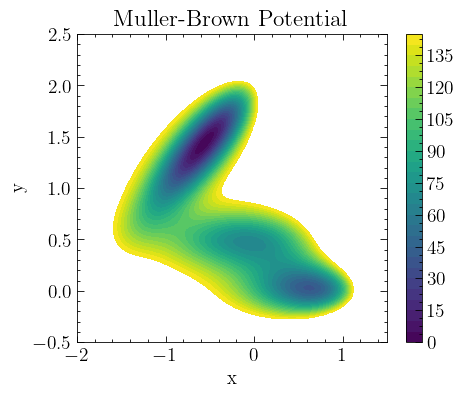

In [12]:
gridx = np.linspace(-2, 1.5, 200)
gridy = np.linspace(-0.5, 2.5, 200)
x, y = np.meshgrid(gridx, gridy)

fes = muller_potential(x,y)

fes = fes - np.min(fes)
fes_plot = np.array(fes)
threshold = 150
fes_plot[fes > threshold] = np.nan

plt.contourf(x, y, fes_plot, levels=np.arange(0, 150, 5), cmap='viridis')
plt.colorbar(); plt.xlabel("x"); plt.ylabel("y"); plt.title("Muller-Brown Potential"); plt.show()

Import the **NEB.py** library to compute the Minimum Energy Pathway

In [15]:
path_lib = "C:\\Users\\fserse\\Desktop\\PhD_Thesis\\CI-NudgedElasticBand\\Lib"
os.chdir(path_lib)

import NEB

path_notebook = "C:\\Users\\fserse\\Desktop\\PhD_Thesis\\CI-NudgedElasticBand\\Notebook"
os.chdir(path_notebook)

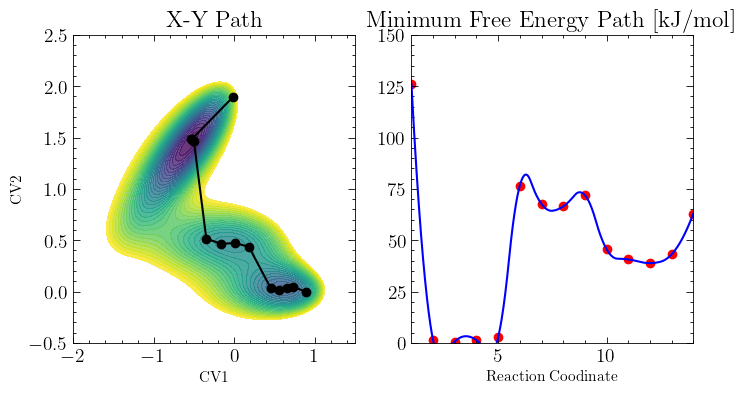

In [428]:
muller_minima = [[-0.01,1.9],[0.9,0.0]]

indice_1 = [np.max(np.where(gridx < muller_minima[0][0])),np.max(np.where(gridy < muller_minima[0][1]))]
indice_2 = [np.max(np.where(gridx < muller_minima[1][0])),np.max(np.where(gridy < muller_minima[1][1]))]


tspan = 80000
dt = 0.0005 
mass = 1
k_el = 100
nreplica = 14
spacing = nreplica
climbing_replica = 6

[pos_store, z_star_hist] = NEB.initialize_pathway(gridx,gridy,fes,tspan, nreplica,indice_1,indice_2,spacing)

pos_old = pos_store[:,:,0]
z_old = z_star_hist[:,0]

[pos_store, z_star_hist, k] = NEB.climbing_image(gridx,gridy,fes,tspan,dt,mass,nreplica,k_el, indice_1, indice_2,spacing, climbing_replica, pos_old, z_old,0)

In [432]:
path_lib = "C:\\Users\\fserse\\Desktop\\PhD_Thesis\\CI-NudgedElasticBand\\Lib"
os.chdir(path_lib)

import importlib
importlib.reload(NEB)

path_notebook = "C:\\Users\\fserse\\Desktop\\PhD_Thesis\\CI-NudgedElasticBand\\Notebook"
os.chdir(path_notebook)

### 2- The Invernizzi Potential

$$ V_{\text{Invernizzi}}(x, y) = 1.34549x^4 + 1.90211x^3y + 3.92705x^2y^2 - 6.44246x^2 
- 1.90211xy^3 + 5.58721xy + 1.33481x + 1.34549y^4 - 5.55754y^2 
+ 0.904586y + 18.5598 $$

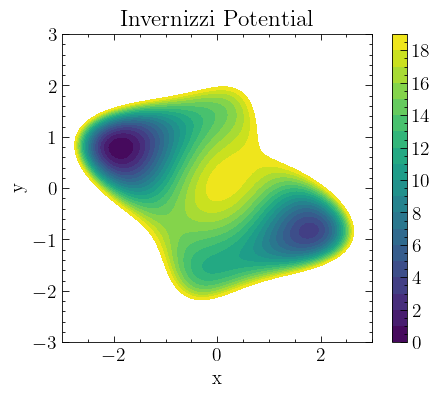

In [520]:
gridx = np.linspace(-3, 3, 200)
gridy = np.linspace(-3, 3, 200)
x, y = np.meshgrid(gridx, gridy)

fes_2 = invernizzi_potential(x,y)

fes_2 = fes_2 - np.min(fes_2)
fes_plot_2 = np.array(fes_2)
threshold = 20
#fes_plot[fes > threshold] = np.nan

plt.contourf(x, y, fes_plot_2, levels=np.arange(0, 20, 1), cmap='viridis')
plt.colorbar(); plt.xlabel("x"); plt.ylabel("y"); plt.title("Invernizzi Potential"); plt.show()

### Compute the Minimum Energy Pathway

Equilibrium positions found for threshold: 0.005
Equilibrium positions found for threshold: 0.005


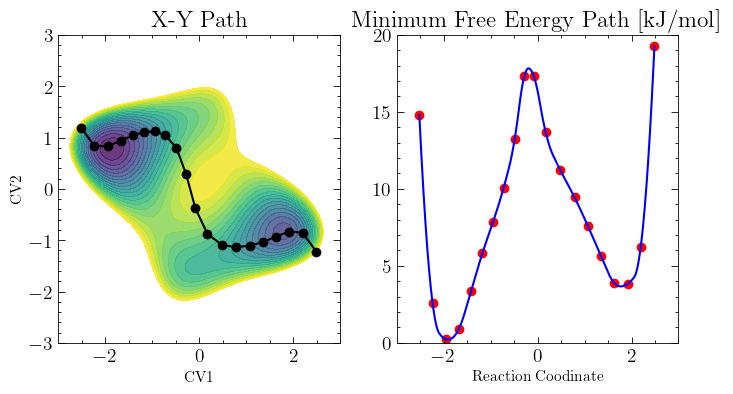

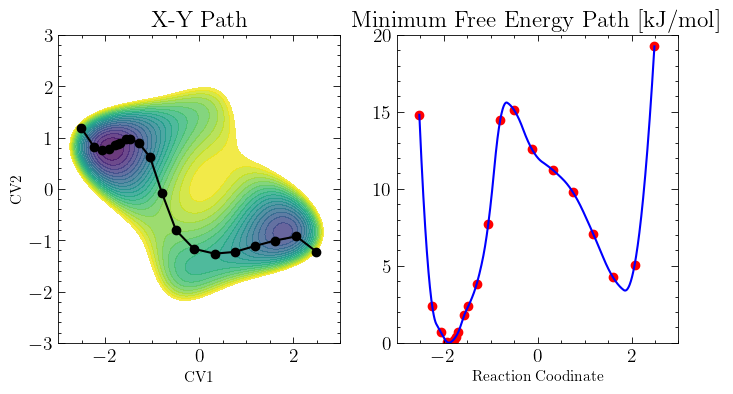

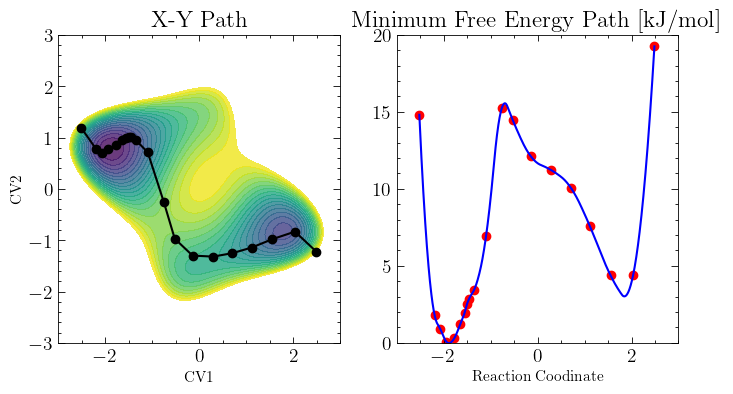

In [302]:
invernizzi_minima = [[-2.5,1.2],[2.5,-1.2]]

indice_1 = [np.max(np.where(gridx < invernizzi_minima[0][0])),np.max(np.where(gridy < invernizzi_minima[0][1]))]
indice_2 = [np.max(np.where(gridx < invernizzi_minima[1][0])),np.max(np.where(gridy < invernizzi_minima[1][1]))]


tspan = 20000
dt = 0.001 
mass = 100
k_el = 50
nreplica = 20
spacing = nreplica
climbing_replica = 12

[pos_store, z_star_hist] = NEB.initialize_pathway(gridx,gridy,fes_2,tspan, nreplica,indice_1,indice_2,spacing)

pos_old = pos_store[:,:,0]
z_old = z_star_hist[:,0]

[pos_store, z_star_hist, k] = NEB.climbing_image(gridx,gridy,fes_2,tspan,dt,mass,nreplica,k_el, indice_1, indice_2,spacing, climbing_replica, pos_old, z_old,0)

pos_old = pos_store[:,:,k]
z_old = z_star_hist[:,k]

tspan = 11000
dt = 0.0001
k_el = 50
[pos_store, z_star_hist, k] = NEB.climbing_image(gridx,gridy,fes_2,tspan,dt,mass,nreplica,k_el, indice_1, indice_2,spacing, climbing_replica, pos_old, z_old,2)

pos_old = pos_store[:,:,k]
z_old = z_star_hist[:,k]

tspan = 50000
dt = 0.001
k_el = 20
[pos_store, z_star_hist, k] = NEB.climbing_image(gridx,gridy,fes_2,tspan,dt,mass,nreplica,k_el, indice_1, indice_2,spacing, climbing_replica, pos_old, z_old,1)


## Case II) CI-NEB with adaptive spring constants

    ** Sensible improvement w.r.t. the fixed spring constants.

### 1- The Muller-Brown Potential

    k_max = 800
    k_min = 100
    number of replicas = 20
    alpha relaxation coefficient for steepest descent = 0.0001

In [33]:
path_lib = "C:\\Users\\fserse\\Desktop\\PhD_Thesis\\CI-NudgedElasticBand\\Lib"
os.chdir(path_lib)

import importlib
importlib.reload(NEB)

path_notebook = "C:\\Users\\fserse\\Desktop\\PhD_Thesis\\CI-NudgedElasticBand\\Notebook"
os.chdir(path_notebook)

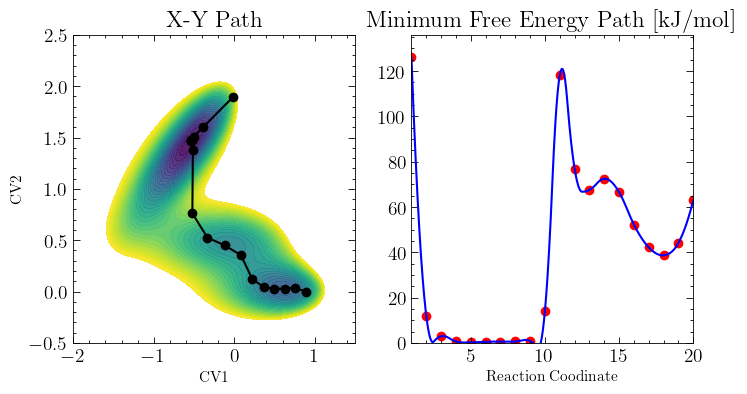

In [34]:
muller_minima = [[-0.01,1.9],[0.9,0.0]]

indice_1 = [np.max(np.where(gridx < muller_minima[0][0])),np.max(np.where(gridy < muller_minima[0][1]))]
indice_2 = [np.max(np.where(gridx < muller_minima[1][0])),np.max(np.where(gridy < muller_minima[1][1]))]


tspan = 50000
nreplica = 20
spacing = nreplica
#climbing_replica = 11

[pos_store, z_star_hist] = NEB.initialize_pathway(gridx,gridy,fes,tspan, nreplica,indice_1,indice_2,spacing)

pos_old = pos_store[:,:,0]
z_old = z_star_hist[:,0]

[pos_store, z_star_hist, k] = NEB.climbing_image(gridx,gridy,fes,tspan,dt,mass,nreplica,k_el, indice_1, indice_2,spacing, climbing_replica, pos_old, z_old,0)

### 1- The Invernizzi Potential

    k_max = 40
    k_min = 10
    number of replicas = 20
    alpha relaxation coefficient for steepest descent = 0.0001

In [587]:
path_lib = "C:\\Users\\fserse\\Desktop\\PhD_Thesis\\CI-NudgedElasticBand\\Lib"
os.chdir(path_lib)

import importlib
importlib.reload(NEB)

path_notebook = "C:\\Users\\fserse\\Desktop\\PhD_Thesis\\CI-NudgedElasticBand\\Notebook"
os.chdir(path_notebook)

Equilibrium positions found for threshold: 0.005
Equilibrium positions found for threshold: 0.005


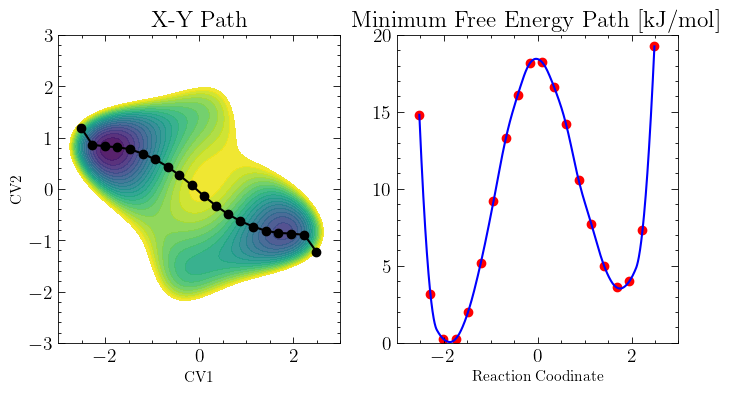

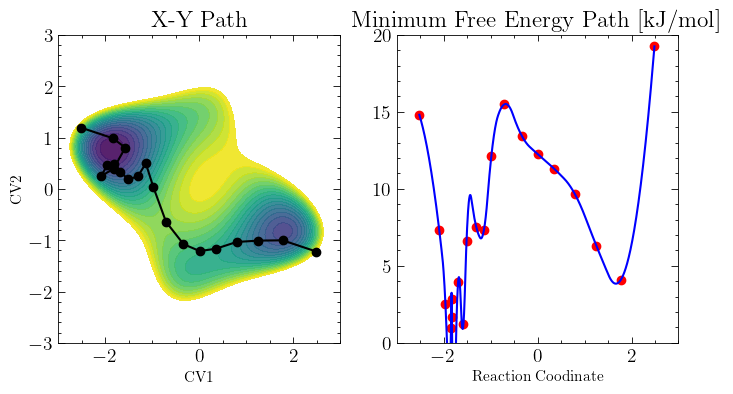

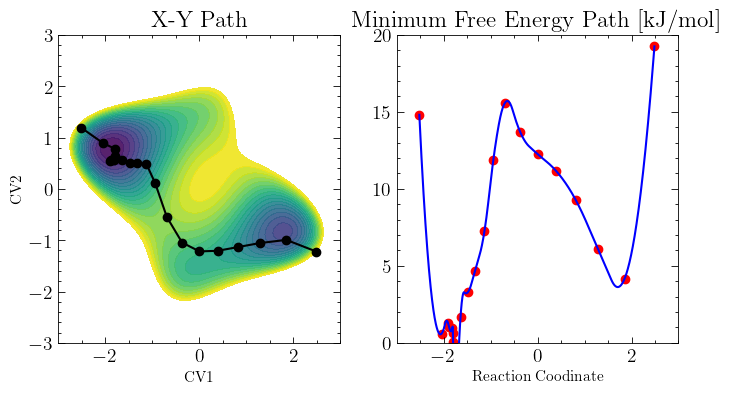

In [588]:
invernizzi_minima = [[-2.5,1.2],[2.5,-1.2]]

indice_1 = [np.max(np.where(gridx < invernizzi_minima[0][0])),np.max(np.where(gridy < invernizzi_minima[0][1]))]
indice_2 = [np.max(np.where(gridx < invernizzi_minima[1][0])),np.max(np.where(gridy < invernizzi_minima[1][1]))]


tspan = 20000
nreplica = 20
spacing = nreplica
climbing_replica = 12

[pos_store, z_star_hist] = NEB.initialize_pathway(gridx,gridy,fes_2,tspan, nreplica,indice_1,indice_2,spacing)

pos_old = pos_store[:,:,0]
z_old = z_star_hist[:,0]

[pos_store, z_star_hist, k] = NEB.climbing_image(gridx,gridy,fes_2,tspan,dt,mass,nreplica,k_el, indice_1, indice_2,spacing, climbing_replica, pos_old, z_old,0)

pos_old = pos_store[:,:,k]
z_old = z_star_hist[:,k]

tspan = 11000
mass = 100
dt = 0.0001

[pos_store, z_star_hist, k] = NEB.climbing_image(gridx,gridy,fes_2,tspan,dt,mass,nreplica,k_el, indice_1, indice_2,spacing, climbing_replica, pos_old, z_old,2)

pos_old = pos_store[:,:,k]
z_old = z_star_hist[:,k]

tspan = 50000

[pos_store, z_star_hist, k] = NEB.climbing_image(gridx,gridy,fes_2,tspan,dt,mass,nreplica,k_el, indice_1, indice_2,spacing, climbing_replica, pos_old, z_old,0)
